<a href="https://colab.research.google.com/github/LeRoidelaRef/ESILV---Python-for-data-analysis---project-2022/blob/main/Projet_Final_Python_for_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import sklearn
# à enlever
import seaborn as sns

In [3]:
colums=["intercolumnar distance","upper margin","lower margin",
        "exploitation","row number","modular ratio","interlinear spacing",
        "weight", "peak number","interlinear spacing","class"]

In [4]:
#import data
def TxtToPandas(colums,name):
  data = pd.read_csv(name, header = None)
  data.columns=colums
  return data

In [5]:
avilatrain=TxtToPandas(colums,'avila-tr.txt')
avilatest=TxtToPandas(colums,'avila-ts.txt')
Ytrain=avilatrain.iloc[:,10]
Xtrain=avilatrain.iloc[:, :-1]
Ytest=avilatest.iloc[:,10]
Xtest=avilatest.iloc[:, :-1]

<BarContainer object of 12 artists>

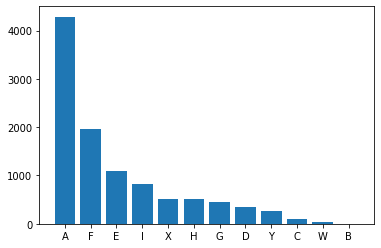

In [6]:
plt.bar(Ytrain.value_counts().keys(),Ytrain.value_counts().values)

In [7]:
 Xtrain.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,interlinear spacing
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

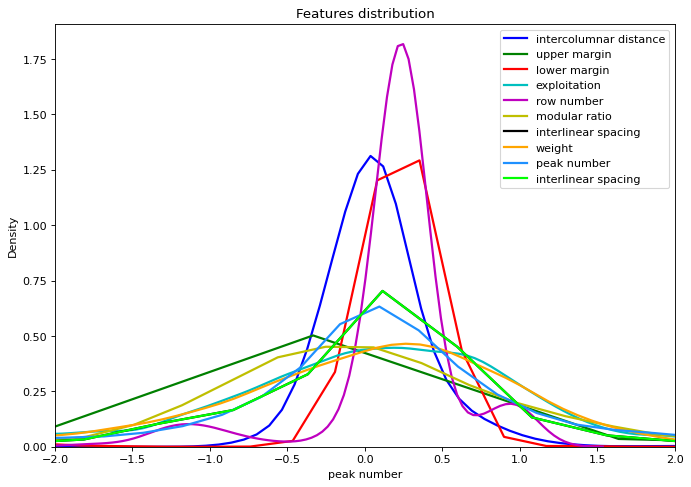

In [8]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(10,7), dpi= 80)
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange','dodgerblue','lime']
for column,col in zip(Xtrain,colours):
    sns.distplot(Xtrain[column], color=col, label=column, **kwargs, hist=False);
plt.xlim(-2,2)
plt.title("Features distribution")
plt.legend();

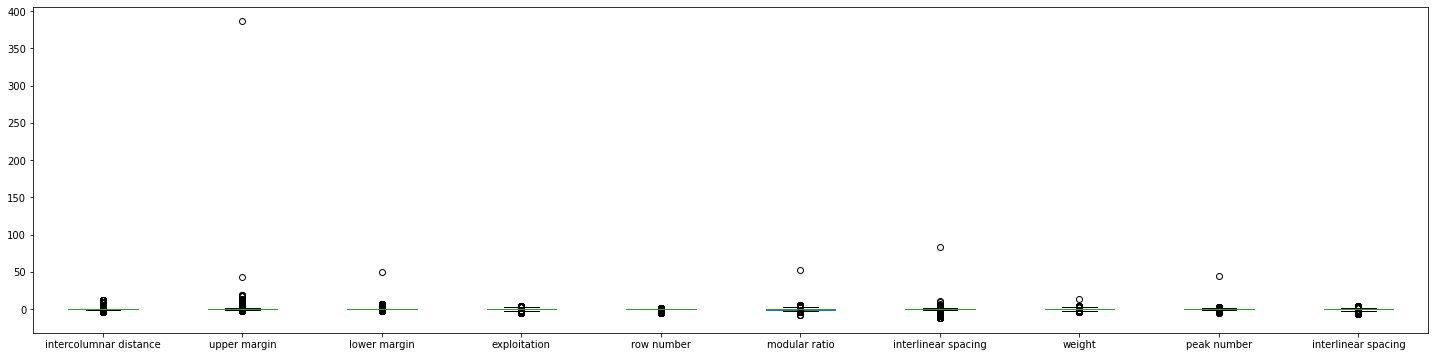

In [9]:
Xtrain.plot(kind='box',figsize=(25,6))

In [10]:
avilatrain2 = avilatrain.drop(avilatrain.index[avilatrain['upper margin'] > 200].tolist()) 
Ytrain2=avilatrain2.iloc[:,10]
Xtrain2=avilatrain2.iloc[:, :-1]

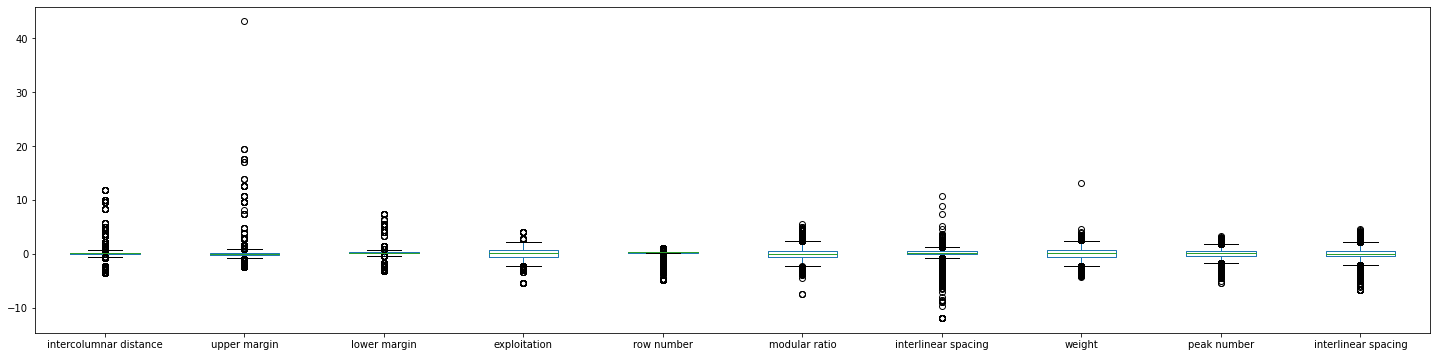

In [11]:
Xtrain2.plot(kind='box',figsize=(25,6))

In [19]:
avilatrain3 = avilatrain2.drop(avilatrain2.index[avilatrain2['upper margin'] > 30].tolist()) 
avilatrain3 = avilatrain2.drop(avilatrain2.index[avilatrain2['weight'] > 10].tolist()) 
Ytrain3=avilatrain3.iloc[:,10]
Xtrain3=avilatrain3.iloc[:, :-1]


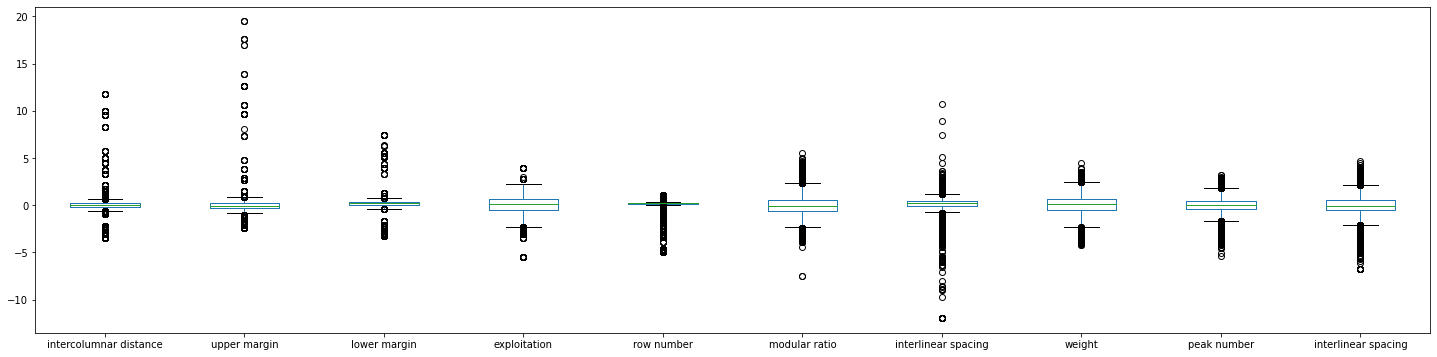

In [20]:
Xtrain3.plot(kind='box',figsize=(25,6))

In [21]:
Xtrain3.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,interlinear spacing
count,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000
mean,0.001188,-0.007535,-0.005012,-0.001882,0.006834,0.009608,-0.001208,0.009035,0.009223,0.001401
std,0.990934,0.953603,1.007133,1.007215,0.991016,0.997023,1.025651,0.995286,0.997380,1.005019
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.423855,-6.719324
25%,-0.128929,-0.261797,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.542021,-0.372457,-0.516086
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111735,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654915,0.500624,0.530794
max,11.819916,19.470188,7.458681,3.987152,1.066121,5.505495,10.714792,4.510897,3.244594,4.671232
